In [ ]:
#setting up datasets and directories

import zipfile
import os

root_path = 'data/'
classes = [i[:len(i)-10] for i in [x for x in os.walk(root_path)][0][2][1:]]
print(classes)

# try:
for i in classes:   
    print(i)
    with zipfile.ZipFile(root_path+i+'-brain.zip', 'r') as zip_ref:
            zip_ref.extractall(root_path+i)
# except PermissionError:
#     print('Permission Error')

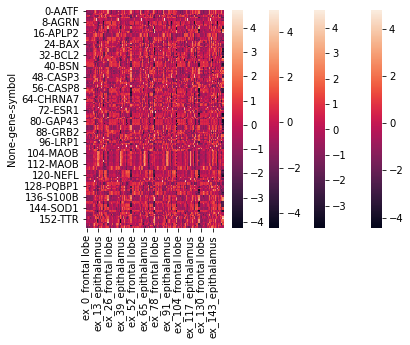

In [175]:
def heatmap(name):

    import csv
    import pandas as pd
    import numpy as np 
    from pandas import DataFrame
    import seaborn as sns
    import random
    from sklearn import preprocessing

    hard_exp = pd.read_csv(f'data/{name}/Expression.csv')
    df_columns = pd.read_csv(f'data/{name}/Columns.csv')    
    df_probes = pd.read_csv(f'data/{name}/Probes.csv')
    col_names = col_names = [f'ex_{i}_{j}' for i, j in enumerate(df_columns['structure_name'])]
    size = hard_exp.shape
    initial_col_names = [f'ex_{i}' for i in range(0, size[1])]
    df_expression = pd.read_csv(f'data/{name}/Expression.csv', names=initial_col_names)

    original_df_expression = df_expression.copy()

    df_expression = df_expression.drop('ex_0', axis=1)
    df_expression.columns = col_names
    df_expression = df_expression.set_index([pd.Index(range(0, df_expression.shape[0])), df_probes['gene-symbol']])
    sns.heatmap(df_expression)

    return df_expression, df_columns, original_df_expression
    
inflammation_signalling_expression, inflammation_signalling_columns, original_inflammation_signalling = heatmap('inflammation-signalling')
alzheimer_expression, alzheimer_columns, original_alzheimer_signalling = heatmap('alzheimer')
transcription_factor_expression, transcription_factor_columns, original_transcription_factor_signalling = heatmap('transcription-factor')
neurodegenerative_expression, neurodegenerative_columns, original_neurodegenerative_signalling = heatmap('neurodegenerative')

['occipital lobe', 'basal forebrain', 'white matter', 'myelencephalon', 'temporal lobe', 'cerebellar nuclei', 'claustrum', 'hippocampal formation', 'globus pallidus', 'ventral thalamus', 'parietal lobe', 'cingulate gyrus', 'cerebellar cortex', 'pontine tegmentum', 'basal part of pons', 'mesencephalon', 'sulci & spaces', 'frontal lobe', 'striatum', 'hypothalamus', 'dorsal thalamus', 'insula', 'epithalamus', 'subthalamus', 'parahippocampal gyrus', 'amygdala']


<AxesSubplot:ylabel='None-gene-symbol'>

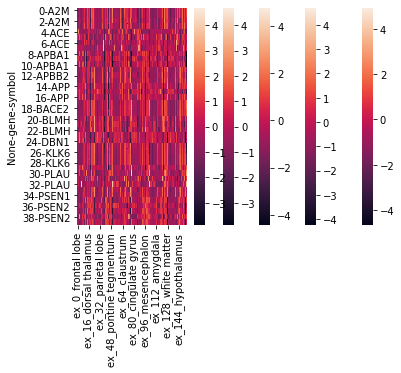

In [176]:
brain_regions = list(set(alzheimer_columns['structure_name']))
print(brain_regions)
transcription_factor_heatmap = sns.heatmap(transcription_factor_expression)
neurodegenerative_heatmap = sns.heatmap(neurodegenerative_expression)
inflammation_signalling_heatmap = sns.heatmap(inflammation_signalling_expression)
alzheimer_heatmap = sns.heatmap(alzheimer_expression)

sns.heatmap(alzheimer_expression)

<AxesSubplot:ylabel='None-gene-symbol'>

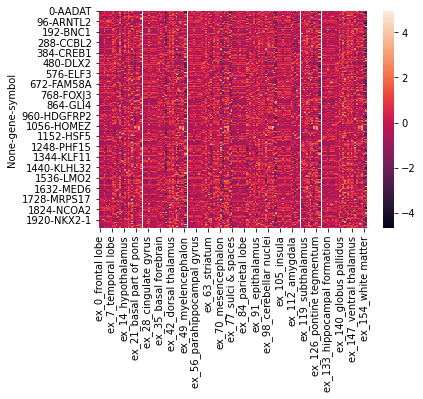

In [177]:
sns.heatmap(transcription_factor_expression)

<AxesSubplot:ylabel='None-gene-symbol'>

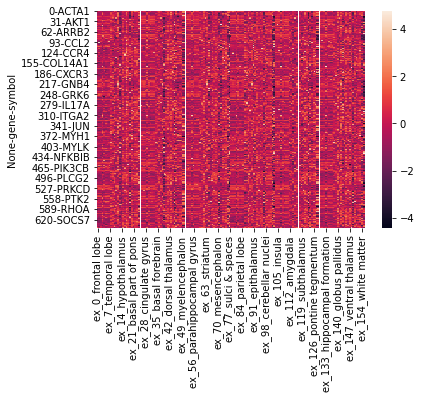

In [178]:
sns.heatmap(inflammation_signalling_expression)

<AxesSubplot:ylabel='None-gene-symbol'>

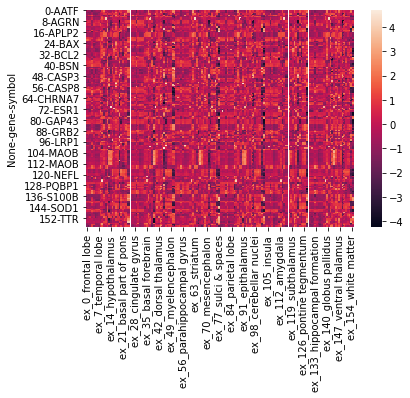

In [179]:
sns.heatmap(neurodegenerative_expression)

In [352]:
possible_number_strings = [str(i) for i in range(0, 2500)]
same_sets = []

for gna in [i[1] for i in neurodegenerative_expression.index.values.tolist()]:
    for gnb in [i[1] for i in inflammation_signalling_expression.index.values.tolist()]:
        if gna == gnb:
            same_sets.append(gna)
list(set(same_sets))

# neurodegenerative -> inflammation
# transcription_factor -> inflammation
# neurodegenerative -> transcription_factor_expression

{'GRB2', 'IL1B', 'MAPK1', 'PRKCG'}

In [381]:
def plot_by_region(expression_data, column_data, data_name, region_name):

    import matplotlib.pyplot as plt
    from itertools import chain

    sorted_region = expression_data.copy()
    sorted_region.columns = [i + str(j).rjust(5, '0') for j, i in enumerate(column_data['structure_name'])]
    sorted_region.reindex(sorted(sorted_region.columns), axis=1)

    region_expression = sorted_region[[point for point in list(sorted_region.columns) if str(region_name) in point]]
    
    plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})

    for region_type in region_expression.columns:
        plt.scatter([i[1] for i in region_expression.index], region_expression[region_type], label=region_type)

    plt.title(f"{data_name} {region_name} expression data")
    plt.legend()
    plt.show()


all_regions = list(set(inflammation_signalling_columns['structure_name']))
# for region in all_regions:
#     plot_by_region(inflammation_signalling_expression, inflammation_signalling_columns, 'inflammation signalling', region)


In [390]:
def distilled_data(common_genes, expression_set1, expression_set2):
    ex1_idx = [i for i in expression_set1.index if i[1] in common_genes]
    ex2_idx = [i for i in expression_set2.index if i[1] in common_genes]

    print(ex1_idx)
    print(ex2_idx)

    distilled_exp1, distilled_exp2 = expression_set1.iloc[[i[0] for i in ex1_idx]], expression_set2.iloc[[i[0] for i in ex2_idx]]

    return distilled_exp1, distilled_exp2

same_inflammation_signalling_expression, same_neurodegenerative_expression = distilled_data(list(set(same_sets)), inflammation_signalling_expression, neurodegenerative_expression)


[(240, 'GRB2'), (241, 'GRB2'), (242, 'GRB2'), (290, 'IL1B'), (291, 'IL1B'), (292, 'IL1B'), (362, 'MAPK1'), (363, 'MAPK1'), (364, 'MAPK1'), (530, 'PRKCG'), (531, 'PRKCG'), (532, 'PRKCG')]
[(88, 'GRB2'), (89, 'GRB2'), (90, 'GRB2'), (91, 'IL1B'), (92, 'IL1B'), (93, 'IL1B'), (114, 'MAPK1'), (115, 'MAPK1'), (116, 'MAPK1'), (132, 'PRKCG'), (133, 'PRKCG'), (134, 'PRKCG')]


In [385]:
distilled_list = [same_inflammation_signalling_expression, same_neurodegenerative_expression]
data_column_list = [inflammation_signalling_columns, neurodegenerative_columns]
data_name_list = ['inflammation signalling', 'neurodegenerative']

for region in all_regions:
    for j, i in enumerate(distilled_list):
        plot_by_region(i, data_column_list[j], data_name_list[j], region)

In [386]:
same_neurodegenerative_expression.head()

,,ex_0_frontal lobe,ex_1_insula,ex_2_cingulate gyrus,ex_3_hippocampal formation,ex_4_parahippocampal gyrus,ex_5_occipital lobe,ex_6_parietal lobe,ex_7_temporal lobe,ex_8_amygdala,ex_9_basal forebrain,...,ex_146_dorsal thalamus,ex_147_ventral thalamus,ex_148_mesencephalon,ex_149_cerebellar cortex,ex_150_cerebellar nuclei,ex_151_basal part of pons,ex_152_pontine tegmentum,ex_153_myelencephalon,ex_154_white matter,ex_155_sulci & spaces
,gene-symbol,,,,,,,,,,,,,,,,,,,,,
88,GRB2,-0.3146,-0.1157,-0.1368,1.7942,0.0901,-0.1158,-0.1927,0.0281,0.8876,0.8154,...,-0.4295,2.5290,0.0417,-1.4663,0.4282,-0.3225,-0.4767,0.0972,-0.5113,-0.4376
89,GRB2,0.5673,0.6339,0.6628,2.1492,0.8370,0.7516,0.6382,0.7234,1.8232,-0.2505,...,-0.4470,-0.3164,-0.6960,0.3279,-0.7712,0.5169,0.3125,0.4869,0.0975,-2.8494
90,GRB2,0.8220,0.8891,0.6489,0.6172,-0.1960,0.6007,0.7379,0.7989,-0.0685,1.9787,...,-0.1836,1.9734,-0.0497,-0.1598,-0.7547,0.0015,-0.7191,-1.7713,-0.7816,-2.1687
91,IL1B,-0.8942,0.3914,-0.9135,-0.7023,0.5362,-1.5476,-1.2417,0.4734,0.3606,-0.6320,...,-1.4042,0.9819,-0.3415,-1.9275,1.1776,-0.6984,-0.3682,-0.5790,2.1434,1.4312
92,IL1B,-0.6217,-0.2305,-0.7669,-0.8590,0.6229,-1.4191,-0.9589,-0.1778,0.6564,-0.1720,...,-0.7909,1.3322,-0.1472,-1.2602,1.6554,-0.8663,-0.1528,0.6048,2.1216,1.7338


In [387]:
same_inflammation_signalling_expression.head()

,,ex_0_frontal lobe,ex_1_insula,ex_2_cingulate gyrus,ex_3_hippocampal formation,ex_4_parahippocampal gyrus,ex_5_occipital lobe,ex_6_parietal lobe,ex_7_temporal lobe,ex_8_amygdala,ex_9_basal forebrain,...,ex_146_dorsal thalamus,ex_147_ventral thalamus,ex_148_mesencephalon,ex_149_cerebellar cortex,ex_150_cerebellar nuclei,ex_151_basal part of pons,ex_152_pontine tegmentum,ex_153_myelencephalon,ex_154_white matter,ex_155_sulci & spaces
,gene-symbol,,,,,,,,,,,,,,,,,,,,,
240,GRB2,-0.3146,-0.1157,-0.1368,1.7942,0.0901,-0.1158,-0.1927,0.0281,0.8876,0.8154,...,-0.4295,2.5290,0.0417,-1.4663,0.4282,-0.3225,-0.4767,0.0972,-0.5113,-0.4376
241,GRB2,0.5673,0.6339,0.6628,2.1492,0.8370,0.7516,0.6382,0.7234,1.8232,-0.2505,...,-0.4470,-0.3164,-0.6960,0.3279,-0.7712,0.5169,0.3125,0.4869,0.0975,-2.8494
242,GRB2,0.8220,0.8891,0.6489,0.6172,-0.1960,0.6007,0.7379,0.7989,-0.0685,1.9787,...,-0.1836,1.9734,-0.0497,-0.1598,-0.7547,0.0015,-0.7191,-1.7713,-0.7816,-2.1687
290,IL1B,-0.8942,0.3914,-0.9135,-0.7023,0.5362,-1.5476,-1.2417,0.4734,0.3606,-0.6320,...,-1.4042,0.9819,-0.3415,-1.9275,1.1776,-0.6984,-0.3682,-0.5790,2.1434,1.4312
291,IL1B,-0.6217,-0.2305,-0.7669,-0.8590,0.6229,-1.4191,-0.9589,-0.1778,0.6564,-0.1720,...,-0.7909,1.3322,-0.1472,-1.2602,1.6554,-0.8663,-0.1528,0.6048,2.1216,1.7338
